### Data Preparation

-------

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time
import json

In [3]:
% matplotlib inline
#import scikitplot
#import scikitplot.plotters as skplt

### Read Data Files

In [4]:
alldf = pd.read_csv("alldf.csv")

In [5]:
with open('data.json', 'r') as fp:
    data_dict = json.load(fp)

---------

In [6]:
def df_creater(data_dict,term):
    unique_lt = set(data_dict[term])
    lt = data_dict[term]
    
    count = []
    for term in unique_lt:
        n = 0
        for another_term in lt:
            if another_term  == term:
                n = n+1
        count.append([term,n])
    cnt = pd.DataFrame(count, columns = ["term","values"])
    cnt = cnt.sort_values(by = ['values'],ascending=False)
    ndf = pd.DataFrame(index = cnt['term'])
    ndf["values"] = np.array(cnt["values"], dtype = float)
    
    return ndf
    

### Analysis

#### 1. Age

In [7]:
data_dict["Age"][0:10]

[' 23 year old',
 ' 18-year-old',
 ' 71-year-old',
 ' 72-year-old',
 ' 70-year-old',
 ' 54-year-old',
 ' 48 year-old',
 ' 27 years old',
 ' 3-year-old',
 ' 52-year-old']

In [8]:
L = []
for itm in data_dict["Age"]:
    L.append(itm.split()[0]) 

In [9]:
L[0:5]

['23', '18-year-old', '71-year-old', '72-year-old', '70-year-old']

#### Gender

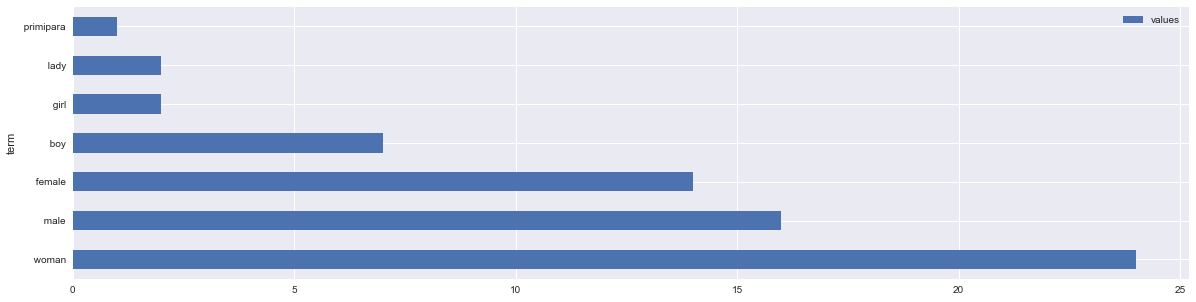

In [10]:
ndf_ss = df_creater(data_dict,term = "Gender")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(20,5) )

--------

#### 2. Sign and Symptomps

In [11]:
data_dict["Sign_symptom"][0:10]

[' malaise',
 ' fever',
 ' pain',
 ' vomiting',
 ' diarrhoea',
 ' pains',
 ' rash',
 ' macules',
 ' lesions',
 ' crusting']

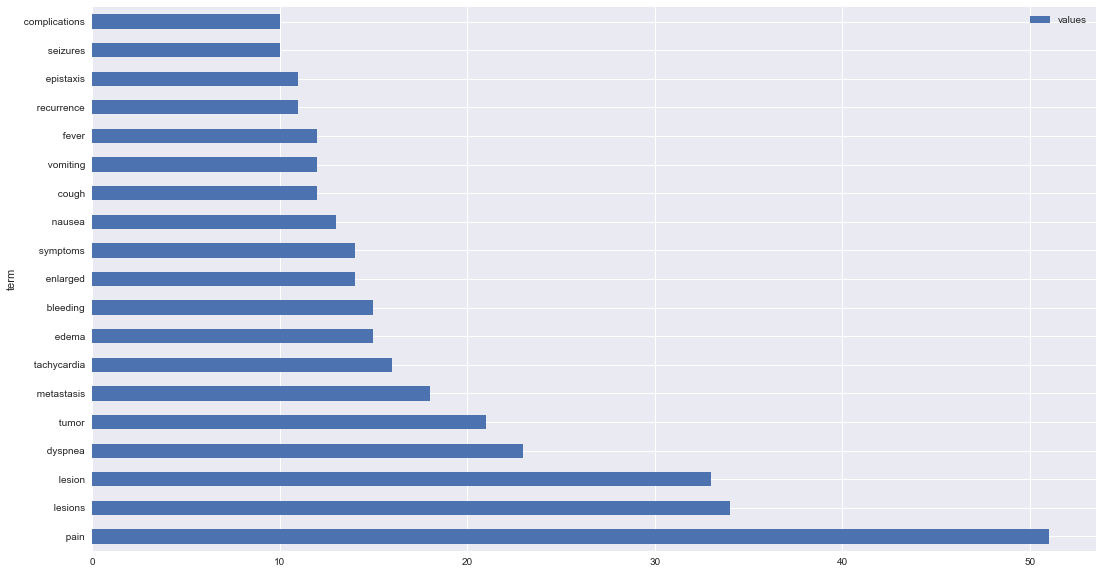

In [12]:
ndf_ss = df_creater(data_dict,term = "Sign_symptom")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(18,10) )

-------

#### 3. Disease Disorder

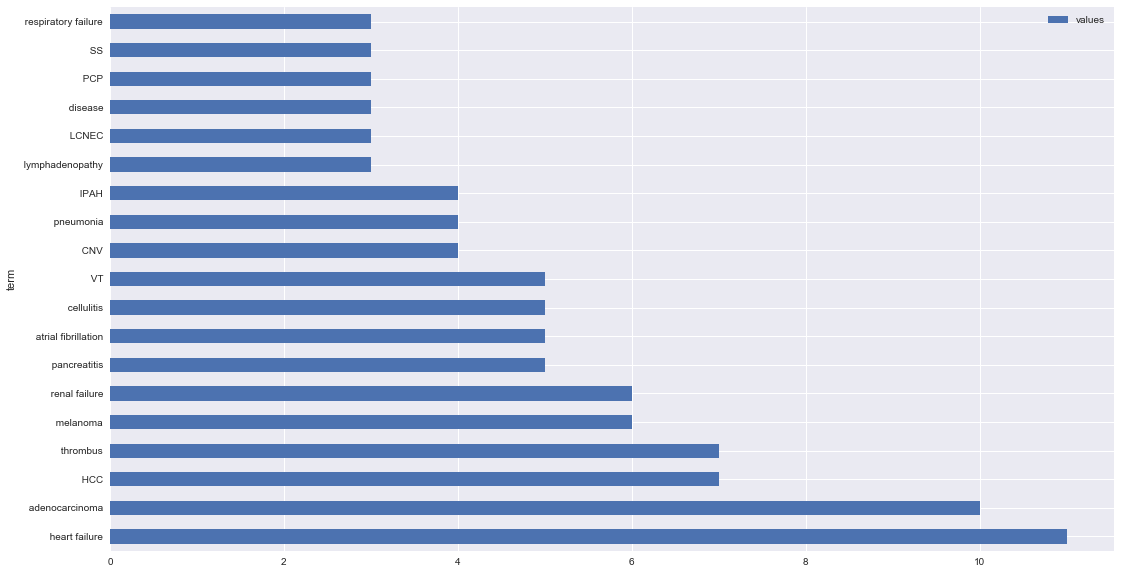

In [22]:
ndf_ss = df_creater(data_dict,term = "Disease_disorder")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(18,10) )

--------

#### 4. Biological Structure

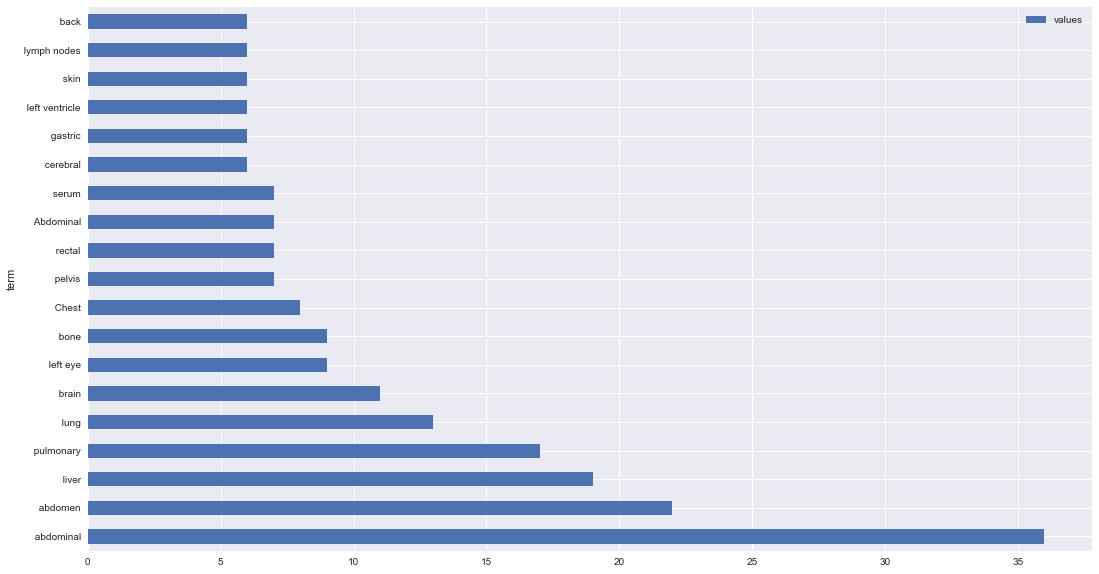

In [23]:
ndf_ss = df_creater(data_dict,term = "Biological_structure")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(18,10) )

#### Diagnostic Procedure

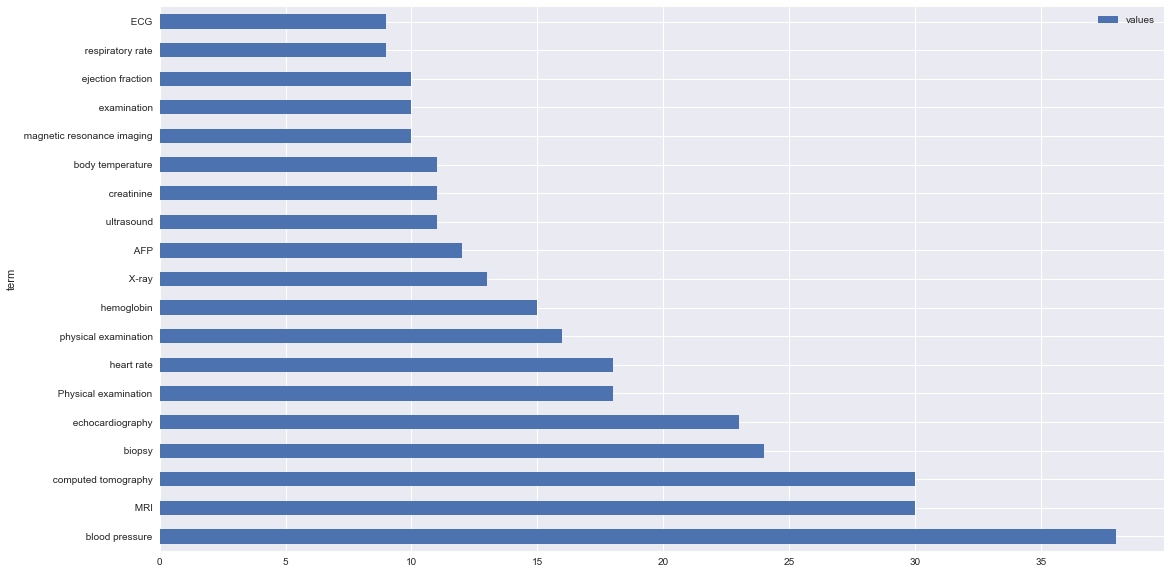

In [25]:
ndf_ss = df_creater(data_dict,term = "Diagnostic_procedure")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(18,10) )

### Therapeutic Procedure

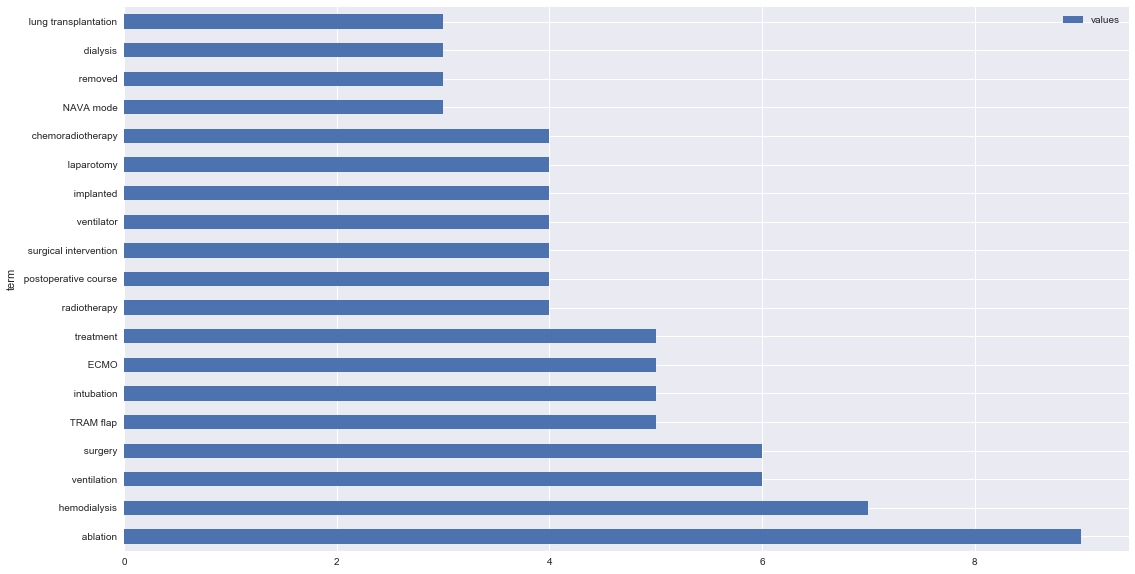

In [26]:
ndf_ss = df_creater(data_dict,term = "Therapeutic_procedure")
ndf_ss = ndf_ss[1:20]
ndf_ss.plot.barh(stacked=False,figsize=(18,10) )

--------

### Text Data

In [3]:
import os
txt_files = os.listdir("./data/txt")[1:]

In [4]:
txt_files[0:10]

['17803823.txt',
 '18561524.txt',
 '19214295.txt',
 '19860006.txt',
 '19860007.txt',
 '20146086.txt',
 '21129213.txt',
 '21254744.txt',
 '21308977.txt',
 '21477357.txt']

In [5]:
wrd = []
for file in txt_files:
    with open('./data/txt/' + file) as f:
        for line in f:
            words = line.split()
            #print(line.split())
            for item in words:
                wrd.append(item)

In [6]:
len(wrd)

43751

### Bag of Words

In [7]:
def df_creater(words):
    unique_wrd = set(words)
    
    
    count = []
    for term in unique_wrd:
        n = 0
        for another_term in words:
            if another_term  == term:
                n = n+1
        count.append([term,n])
    cnt = pd.DataFrame(count, columns = ["term","values"])
    cnt = cnt.sort_values(by = ['values'],ascending=False)
    ndf = pd.DataFrame(index = cnt['term'])
    ndf["values"] = np.array(cnt["values"], dtype = float)
    
    return ndf

In [8]:
ndf = df_creater(wrd)

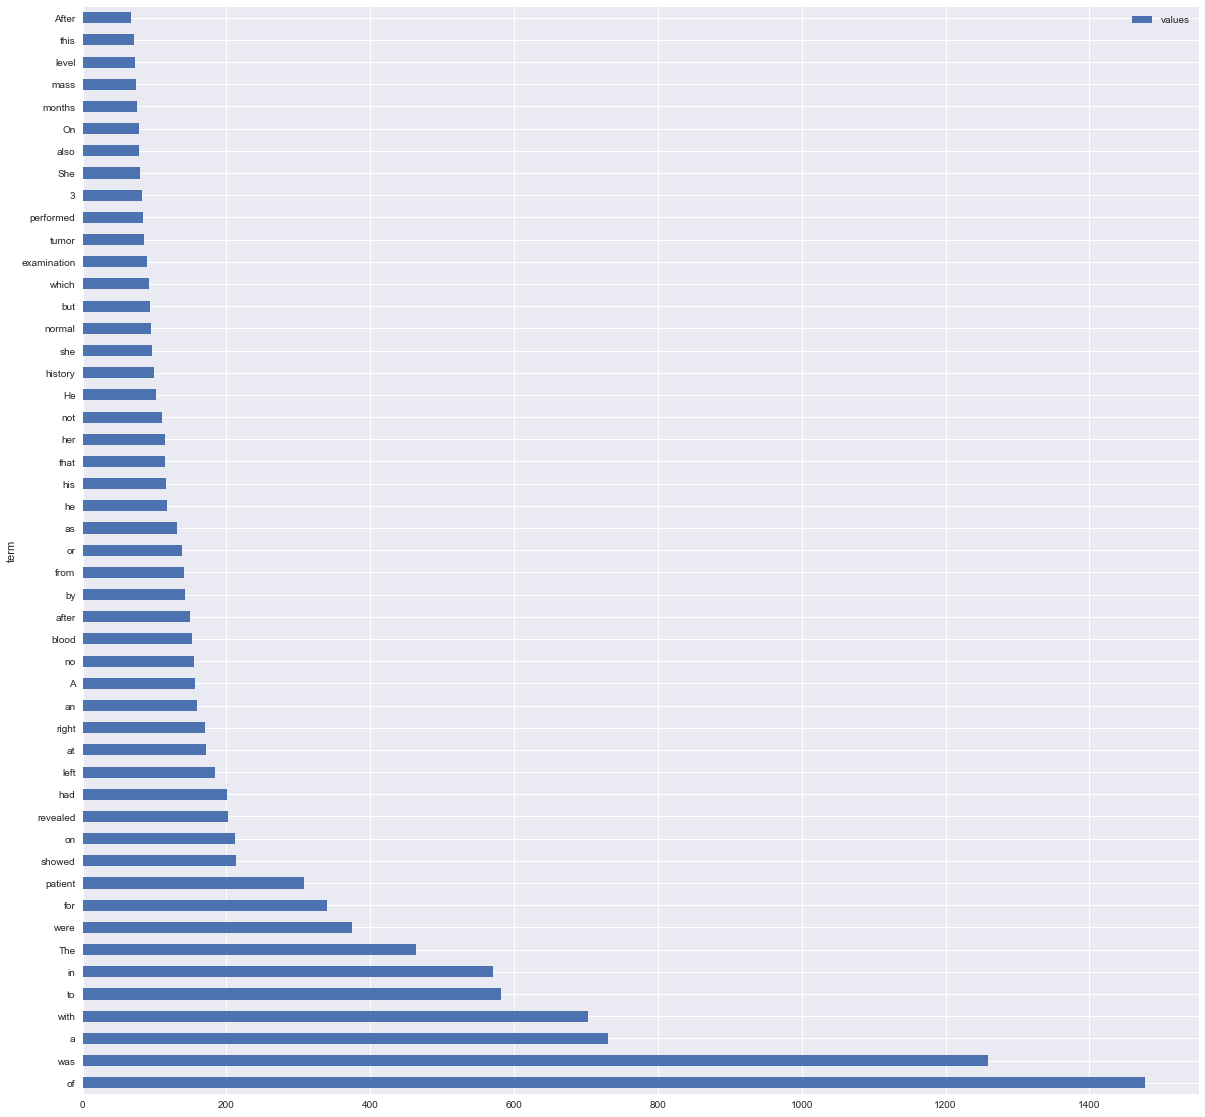

In [16]:
ndf = ndf[1:50]
ndf.plot.barh(stacked=False,figsize=(20,20) )

In [22]:
cut_ndf = ndf[ndf["values"]<100]

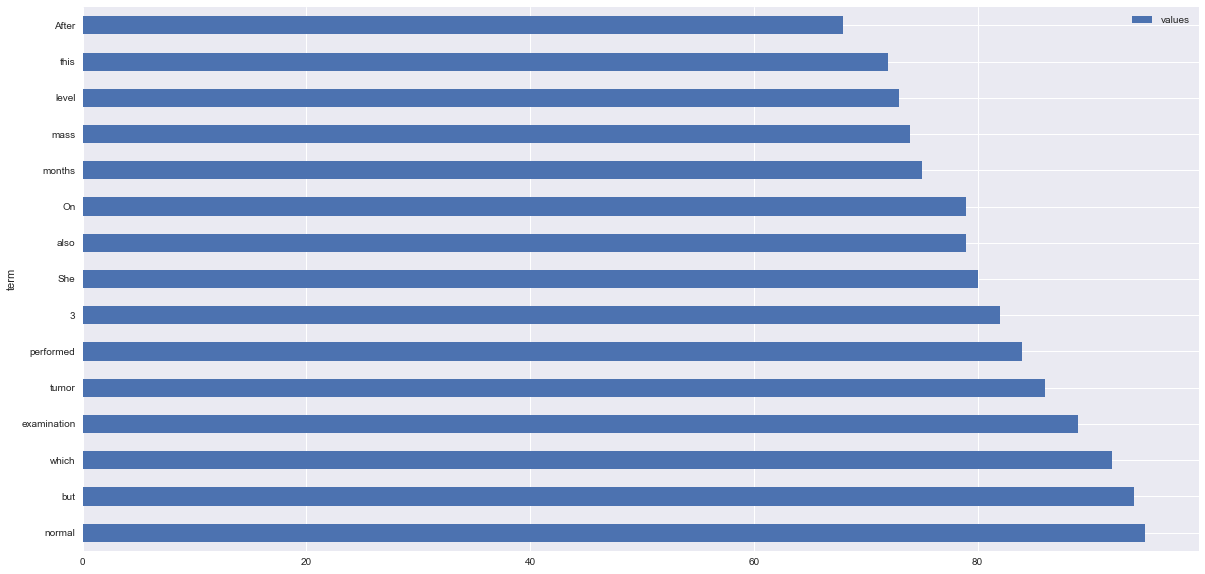

In [24]:
cut_ndf = cut_ndf[1:50]
cut_ndf.plot.barh(stacked=False,figsize=(20,10) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b1aa6d68>]], dtype=object)

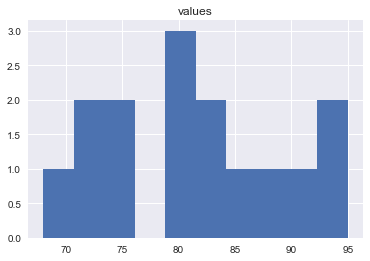

In [28]:
cut_ndf.hist()

### TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [13]:
tfidf_vectorizer = TfidfVectorizer(analyzer="word",
                                   tokenizer=nltk.word_tokenize,
                                   preprocessor=None,
                                   stop_words='english',
                                   max_features=None)
sparce_tfidf = tfidf_vectorizer.fit_transform(wrd)

In [14]:
sparce_tfidf.shape

(43751, 7048)

In [15]:
tfidf = sparce_tfidf.toarray()
tfidf.shape

(43751, 7048)

### Word2Vec